# CHANGE DETECTION
### Change detection is considered as a challenging issue in the field of satellite image processing due to the presence of significant intensity differences between the input images. Although a variety of algorithms have been proposed in recent time to detect the changes in remote sensing optical images, most of them suffer from handling large intensity variations of the images. In this paper, an unsupervised change detection method is proposed which uses image local self-similarity information to take care of large intensity variations of the input images. Initially, feature vectors are constructed for each of the pixels of the input images using local self-similarity information of images. Then, binary feature vectors are created from these feature vectors using a thresholding criterion. Finally, these binary feature vectors of the corresponding locations of the images are utilized to identify the changed and unchanged pixels. Experiments on different sets of optical satellite images show the effectiveness of the proposed method. 

In [1]:
#Importing modules:-
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image as imm

In [2]:
# calculating the difference pixel for each image
def diff1(i,j,k,l):
    global sum1
    for p in range(-1,2):
        for q in range(-1,2):
            sum1=sum1+(int(image[i+p][j+q])-int(image[k+p][l+q]))**2
    sum1=2.72**(0-sum1)

def diff2(i,j,k,l):
    global sum1
    
    for p in range(-1,2):
        for q in range(-1,2):
            sum1+=(int(image2[i+p][j+q])-int(image2[k+p][l+q]))**2
    sum1=2.72**(0-sum1)

In [10]:
# appending the difference pixel in array
def fun(i,j):
    m=0
    for k in range(-2,3):
        for l in range(-2,3):
            global sum1
            sum1=0
            diff1(i,j,i+k,j+l)
            Th.append(sum1)
            if(sum1!=0):
                m=m+1
            sum1=0
            diff2(i,j,i+k,j+l)
            Th2.append(sum1)
            if(sum1!=0):
                m=m+1

In [ ]:
#calculating the average threshold
    t=0
    if(m!=0):
        t=(sum(Th)+sum(Th2))/m
    #comparing the threshold and taking xor
    for k in range(25):
        if(abs(t)>abs(Th[k])):
            a1.append(0)
        else:
            a1.append(1)
    for k in range(25):
        if(abs(t)>abs(Th2[k])):
            b1.append(0)
        else:
            b1.append(1)
    for k in range(25):
        xora.append(a1[k]^b1[k])
    n1=0
    for k in range(25):
        if(xora[k]==1):
            n1=n1+1
    if(n1>4):
        return 1
    return 0    

In [12]:
#reading the image
im = cv2.imread("set11.tif",0)
im2 = cv2.imread("set12.tif",0)

In [13]:
#padding of image
image = cv2.copyMakeBorder(im, 3, 3, 3, 3, cv2.BORDER_CONSTANT)
image2 = cv2.copyMakeBorder(im2, 3, 3, 3, 3, cv2.BORDER_CONSTANT)
r=image.shape[0]
c=image.shape[1]

In [14]:
#Creating the numpy array
ans= np.full((r,c),0)

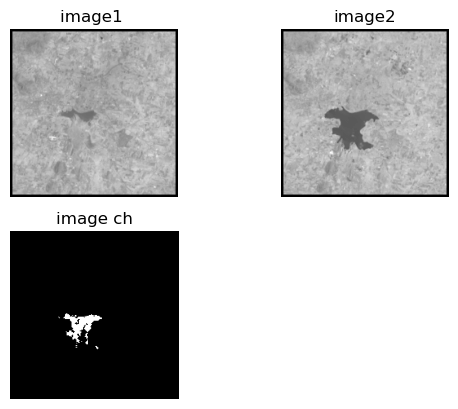

In [15]:
global sum1
sum1=0

for i in range(2,r-3):
    for j in range(2,c-3):
        Th=[]
        Th2=[]
        a1=[]
        b1=[]
        xora=[]
        ans[i][j]=fun(i,j)

out = np.array(ans, dtype=np.uint8)
new=((out/1)*255.9).astype(np.uint8)
cv2.imwrite("r3.tif", new[ 3:r-3, 3:c-3 ]   )
plt.subplot(221), plt.imshow(image,'gray'),plt.title("image1 "),plt.axis('off')
plt.subplot(222), plt.imshow(image2,'gray'),plt.title("image2"),plt.axis('off')
plt.subplot(223), plt.imshow(out,'gray'),plt.title("image ch"),plt.axis('off')
plt.show()